In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
dat = pd.read_csv('Churn_Modelling.csv')
dat.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
dat.shape

(10000, 14)

In [60]:
dat['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [25]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [26]:
dat.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
# drop 1st 3 col since it does not have any effect on label
dat.drop(['RowNumber','CustomerId','Surname'], axis = 1, inplace = True)

In [28]:
dat.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:>

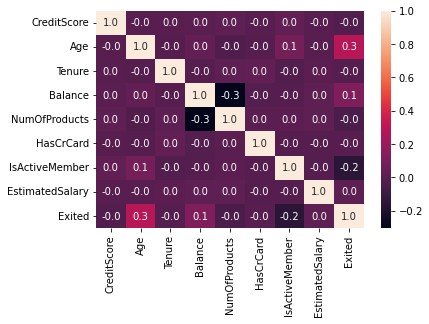

In [29]:
# check the correlation
sns.heatmap(dat.corr(), annot = True, fmt='0.1f')

In [30]:
#convert categorical data into numerical

dat['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [31]:
dat['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [32]:
# label encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dat['Gender'] = le.fit_transform(dat['Gender'])
# dat['Geography'] = le.fit_transform(dat['Geography'])
dat.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [33]:
x = pd.get_dummies(dat['Geography'])
x.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [34]:
#concatenate dat nd x

dat = pd.concat([dat, x], axis = 1)
dat.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [35]:
dat.drop('Geography', axis = 1, inplace= True)
dat.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [36]:
# split data for train nd test

X = dat.drop('Exited', axis=1)
Y = dat['Exited']

In [38]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [39]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size=0.2,random_state=2)

In [41]:
xtrain.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
8856,774,0,26,5,0.00,2,1,1,64716.08,1,0,0
1545,602,0,42,6,158414.85,1,1,1,131886.46,0,1,0
8136,716,0,38,1,0.00,2,1,1,99661.46,1,0,0
7768,601,0,20,9,122446.61,2,1,0,86791.90,0,0,1
7782,585,1,54,8,87105.32,1,1,1,55346.14,1,0,0


In [42]:
xtest.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
7878,731,0,38,10,123711.73,2,1,0,171340.68,1,0,0
3224,645,0,41,2,138881.04,1,1,0,129936.53,0,1,0
1919,618,1,56,7,0.00,1,1,1,142400.27,1,0,0
4432,621,1,33,4,0.00,2,1,1,40299.23,0,0,1
4835,561,1,34,4,85141.79,2,1,1,29217.37,0,0,1


In [43]:
#feature scaling using standard scalar

In [44]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [47]:
# it is converted into array 
xtrain[:1]

array([[ 1.27754581, -1.0862028 , -1.23264342, -0.012743  , -1.23961517,
         0.81118618,  0.64920267,  0.96510833, -0.62027126,  1.0010005 ,
        -0.58408625, -0.57138416]])

In [48]:
xtest[:1]

array([[ 0.83326067, -1.0862028 , -0.09508124,  1.71512123,  0.74851603,
         0.81118618,  0.64920267, -1.03615311,  1.23198813,  1.0010005 ,
        -0.58408625, -0.57138416]])

In [50]:
# classification model - Logistic regression --> Binary Classification

from sklearn.linear_model import LogisticRegression
 
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [53]:
ypred = model.predict(xtest[30:35])
ypred

array([0, 0, 0, 0, 0], dtype=int64)

In [54]:
ytest[30:35]

8500    0
801     0
2024    1
1345    0
3279    0
Name: Exited, dtype: int64

In [57]:
model.score(xtest,ytest)

0.8155

In [58]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

ypred = model.predict(xtest)
mat = confusion_matrix(ytest, ypred)
mat

array([[1561,   56],
       [ 313,   70]], dtype=int64)

<AxesSubplot:>

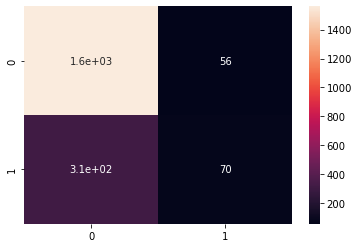

In [59]:
sns.heatmap(mat, annot=True)